In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [9]:
business = pd.read_json("yelp_academic_dataset_business.json", lines=True)
business.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [10]:
state_review_count = business.groupby("city").sum("review_count")["review_count"].sort_values(ascending=False).head(20)
state_review_count

city
Philadelphia        936240
New Orleans         621361
Nashville           441053
Tampa               439506
Tucson              387254
Indianapolis        349228
Reno                334610
Santa Barbara       262853
Saint Louis         244360
Boise               101893
Edmonton             98204
Clearwater           84190
Saint Petersburg     76219
Sparks               69567
Metairie             61970
St. Louis            61270
Franklin             54785
St. Petersburg       52620
Goleta               44126
Wilmington           43005
Name: review_count, dtype: int64

Text(0.5, 0, 'City')

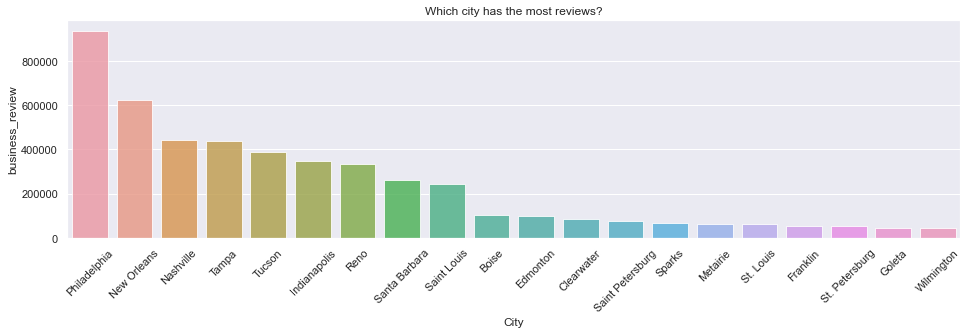

In [11]:
f, axis = plt.subplots(1,1,figsize=(16,4))
sns.barplot(state_review_count.index, state_review_count.values, alpha=0.8, ax=axis)

plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('business_review', fontsize=12)
plt.xlabel('City', fontsize=12)

In [12]:
business_phi = business.query("city == 'Philadelphia'")
head_10 = business_phi.sort_values(by=['review_count'], ascending=False).head(10).sort_values(by="stars", ascending=False)
head_10

business_id                            name  \
143157  ytynqOUb3hjKeJfRj5Tshw         Reading Terminal Market   
31165   ctHjyadbDQAtUFfkcAFEHw                           Zahav   
64928   6ajnOk0GcY9xbb5Ocaw8Gw                        Barbuzzo   
131670  9PZxjhTIU7OgPIzuGi89Ew                          El Vez   
20078   j-qtdD55OLfSqfsWuQTDJg                            Parc   
36746   RQAF6a0akMiot5lZZnMNNw  Dalessandro’s Steaks & Hoagies   
149325  0RuvlgTnKFbX3IK0ZOOocA                 Green Eggs Café   
53452   sTPueJEwcRDj7ZJmG7okYA                  Jim's South St   
113983  PP3BBaVxZLcJU54uP_wL6Q            Pat's King of Steaks   
57332   IkY2ticzHEn4QFn8hQLSWg                   Geno's Steaks   

                    address          city state postal_code   latitude  \
143157         51 N 12th St  Philadelphia    PA       19107  39.953341   
31165       237 St James Pl  Philadelphia    PA       19106  39.946261   
64928         110 S 13th St  Philadelphia    PA       19107  39.950007   
131670        121 S 13th St  Philadelphia    PA       19107  39.949702   
20078         227 S 18th St  Philadelphia    PA       19103  39.949172   
36746       600 Wendover St  Philadelphia    PA       19128  40.029494   
149325        212 S 13th St  Philadelphia    PA       19107  39.948123   
53452              400 S St  Philadelphia    PA       19147  39.941498   
113983  1237 E Passyunk Ave  Philadelphia    PA       19147  39.933201   
57332         1219 S 9th St  Philadelphia    PA       19147  39.933837   

        longitude  stars  review_count  is_open  \
143157 -75.158855    4.5          5721        1   
31165  -75.145135    4.5          3065        1   
64928  -75.162158    4.5          2893        1   
131670 -75.161770    4.0          3187        1   
20078  -75.170727    4.0          2761        1   
36746  -75.205971    4.0          2686        1   
149325 -75.162463    4.0          2679        1   
53452  -75.149272    3.5          2736        1   
113983 -75.159266    3.0          4250        1   
57332  -75.158814    2.5          3401        1   

                                               attributes  \
143157  {'RestaurantsGoodForGroups': 'True', 'Restaura...   
31165   {'RestaurantsAttire': ''casual'', 'BikeParking...   
64928   {'WiFi': 'u'no'', 'Caters': 'False', 'Restaura...   
131670  {'RestaurantsReservations': 'True', 'BYOBCorka...   
20078   {'OutdoorSeating': 'True', 'RestaurantsGoodFor...   
36746   {'NoiseLevel': 'u'average'', 'RestaurantsAttir...   
149325  {'BusinessParking': '{'garage': False, 'street...   
53452   {'BusinessParking': '{'garage': False, 'street...   
113983  {'RestaurantsReservations': 'False', 'Corkage'...   
57332   {'RestaurantsReservations': 'False', 'Corkage'...   

                                               categories  \
143157  Candy Stores, Shopping, Department Stores, Fas...   
31165   Nightlife, Bars, Food, Ethnic Food, Middle Eas...   
64928          Mediterranean, Restaurants, Pizza, Italian   
131670  Lounges, Bars, Nightlife, Breakfast & Brunch, ...   
20078   Restaurants, French, Wine Bars, Nightlife, Ame...   
36746        Sandwiches, Delis, Restaurants, Cheesesteaks   
149325  Restaurants, American (New), Diners, Breakfast...   
53452   Bars, Restaurants, Pizza, Cheesesteaks, Italia...   
113983  Italian, American (Traditional), Sandwiches, F...   
57332   Sandwiches, Cheesesteaks, Steakhouses, Restaur...   

                                                    hours  
143157  {'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...  
31165   {'Monday': '0:0-0:0', 'Tuesday': '16:45-21:30'...  
64928   {'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...  
131670  {'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ...  
20078   {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...  
36746   {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...  
149325  {'Monday': '9:0-15:0', 'Tuesday': '9:0-15:0', ...  
53452   {'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...  
113983  {'Monday': '0:0-0:0', '

**start**

In [13]:
import re
import nltk
import string
from wordcloud import WordCloud
from PIL import Image
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import plotly.express as px
from matplotlib import cm

In [14]:
RTM = head_10.iloc[0]
RTM


business_id                                ytynqOUb3hjKeJfRj5Tshw
name                                      Reading Terminal Market
address                                              51 N 12th St
city                                                 Philadelphia
state                                                          PA
postal_code                                                 19107
latitude                                                39.953341
longitude                                              -75.158855
stars                                                         4.5
review_count                                                 5721
is_open                                                         1
attributes      {'RestaurantsGoodForGroups': 'True', 'Restaura...
categories      Candy Stores, Shopping, Department Stores, Fas...
hours           {'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...
Name: 143157, dtype: object

**tip** 太少了

In [15]:
tip = pd.read_json("yelp_academic_dataset_tip.json", lines=True)
tip.head()

user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                date  \
0                     Avengers time with the ladies. 2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
2             It's open even when you think it isn't 2013-08-18 00:56:08   
3                          Very decent fried chicken 2017-06-27 23:05:38   
4             Appetizers.. platter special for lunch 2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [16]:
tip_RTM = tip[tip['business_id']=='ytynqOUb3hjKeJfRj5Tshw']
tip_RTM.head()

user_id             business_id  \
2484   TvkqJ8YEIsTb16RnnrNyfQ  ytynqOUb3hjKeJfRj5Tshw   
12882  tUk5YA-YB1CBE5DM2izdWQ  ytynqOUb3hjKeJfRj5Tshw   
13085  q99qZRwCLHek_5wWn_xKYw  ytynqOUb3hjKeJfRj5Tshw   
17116  WygOFY9OQYOI4ocb3zmSYQ  ytynqOUb3hjKeJfRj5Tshw   
26510  bDCCzWxv2fU-z7eeaFzKxQ  ytynqOUb3hjKeJfRj5Tshw   

                                                    text                date  \
2484                                         Disfrutando 2012-06-16 19:18:43   
12882  Philly classic, always great for breakfast or ... 2017-10-01 05:48:14   
13085  Good food. Very crowded but a lot of choices. ... 2017-06-18 21:32:30   
17116     I always love this place when we come to town. 2015-09-14 11:29:39   
26510  Strange religious materials litter the adminis... 2012-06-06 15:36:41   

       compliment_count  
2484                  0  
12882                 0  
13085                 0  
17116                 0  
26510                 0

$词频分析$

In [17]:
# review = pd.read_json("yelp_academic_dataset_review.json", lines=True)
# review.head()
# review_RTM = review[review['business_id']=='ytynqOUb3hjKeJfRj5Tshw']
# review_RTM.head()
# review_RTM.to_json('dataset_review_RTM.json')

In [18]:
review_RTM = pd.read_json("dataset_review_RTM.json")
user = pd.read_json('yelp_academic_dataset_user.json', lines=True)
review_RTM

review_id                 user_id  \
6290881  kKC5pBPkUCWo6mKYFUewRw  mGnZFbk2gqLLtGW-mYo__A   
6291053  sFQrhTbTah0o2kU_Pi2D0Q  Tu4ATXLhy8kRTjpQCnl2pA   
6291157  kqn1uP3LRVjVDUD44ZSu1A  vRNb2IaGlsZRA_wUf3Ov8w   
6291166  qMsTe9QznpNQk1AKbYLp-w  29K-usmZfVDeIaQ85EG54A   
6291460  nmMIRBNONIICe7CFHnfadQ  1jE--VcTddwXGampD23JCg   
...                         ...                     ...   
6988905  FS4s6ANq0cCB7oGx0Jja_A  IrxE8r0s0jHl1O7-ZO2vaQ   
6989657  -cwyNL9V16r00LaZpWYKyQ  JcozeLfzqqcb0zu4BFA-Vg   
6989825  lxhApXYxKTg6hgnbD93Tag  aREzu8wiB_1NYMzi_TgN0A   
6990041  4yFZtkdc7SPueWozB6zmwQ  ttg9bK1FuUDZQNIleuR-KQ   
6990255  MVg4YUQeEhCA7Z7RsBJSVg  7-7A0Avj47slLGV7yBFc8w   

                    business_id  stars  useful  funny  cool  \
6290881  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291053  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291157  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291166  ytynqOUb3hjKeJfRj5Tshw      4       5      2     3   
6291460  ytynqOUb3hjKeJfRj5Tshw      4       0      0     0   
...                         ...    ...     ...    ...   ...   
6988905  ytynqOUb3hjKeJfRj5Tshw      5       2      0     0   
6989657  ytynqOUb3hjKeJfRj5Tshw      5       1      0     0   
6989825  ytynqOUb3hjKeJfRj5Tshw      5       1      2     1   
6990041  ytynqOUb3hjKeJfRj5Tshw      5       0      1     0   
6990255  ytynqOUb3hjKeJfRj5Tshw      3       1      0     0   

                                                      text                date  
6290881  I love this place! Doesn't take me long to get... 2016-08-25 16:30:53  
6291053  One of my favorite places to go to in Philly, ... 2016-07-14 20:24:15  
6291157  This might be a bit unfair to have a single re... 2017-04-07 22:27:22  
6291166  Alright, I remember the first time I went to t... 2017-07-18 17:33:29  
6291460  It's an experience, to say the least!  Not as ... 2013-08-03 20:18:22  
...                                                    ...                 ...  
6988905  Love this market! This is a popular destinatio... 2018-03-28 19:39:19  
6989657  Love it here!\n\nEveryone has to visit here ev... 2019-09-27 14:43:56  
6989825  Market full of treats and foods to eat and try... 2011-07-13 22:53:14  
6990041  If it wasn't for my friend dragging me out, I ... 2019-12-21 18:46:06  
6990255  I was so excited about all the food I saw, but... 2013-07-25 21:00:15  

[5778 rows x 9 columns]

In [19]:
user.head()

user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665  2008-07-25 10:41:00    2086   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79  2007-01-05 19:40:59      29   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2   1010   1003                           2009,2010,2011,2012,2013   
3    330    299                                     2009,2010,2011   
4     15      7                                                      

                                             friends  fans  ...  \
0  NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1  ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2  LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
3  enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...    28  ...   
4  PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...     1  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0               65                  55               56               18   
1              264                 184              157              251   
2               13                  10               17                3   
3                4                   1                6                2   
4                1                   0                0                0   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0              232               844              467               467   
1             1847              7054             3131              3131   
2               66                96              119               119   
3               12                16               26                26   
4                1                 1                0                 0   

   compliment_writer  compliment_photos  
0                239                180  
1               1521               1946  
2                 35                 18  
3                 10                  9  
4                  0                  0  

[5 rows x 22 columns]

In [20]:
#data clean
# stopwords
nltk.download('stopwords')
i = nltk.corpus.stopwords.words('english')
j = list(string.punctuation)
stopwords = set(i).union(j)

#leave letter and space
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())
    x = [w for w in x.split() if w not in set(stopwords)]
    return ' '.join(x)
review_RTM['text_clear'] = review_RTM['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huangjingjuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#word statistics
review_cats=' '.join(review_RTM['text_clear'])
cats=pd.DataFrame(review_cats.split(' '),columns=['review'])
x=cats.review.value_counts()
x=x.sort_values(ascending=False)
x

place            4953
food             4071
market           3516
great            2268
get              1969
                 ... 
fotografiable       1
placer              1
que                 1
brinf               1
workershaha         1
Name: review, Length: 13725, dtype: int64

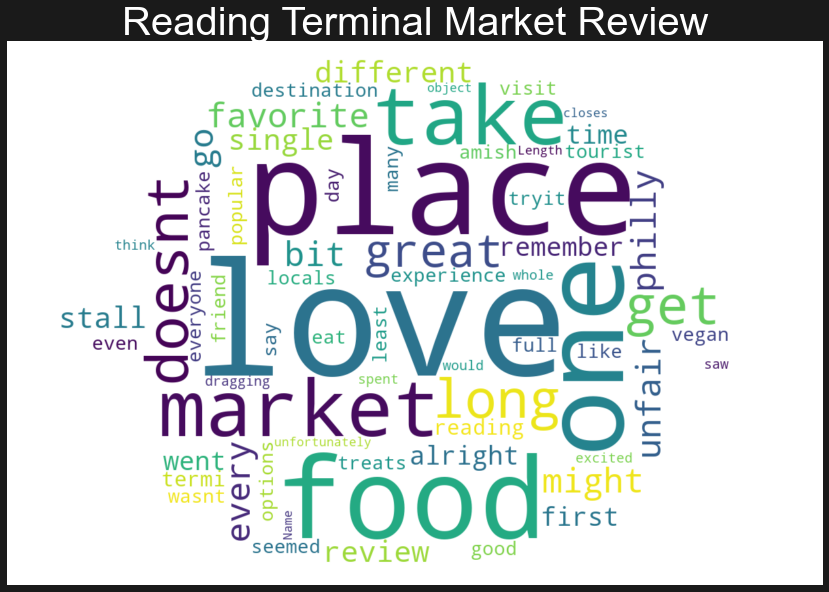

In [22]:
#wordcloud
background = Image.open("/Users/huangjingjuan/DataspellProjects/DataScience/R-C.a4cf05156d135d09402da8d2addc075e.png")
graph = np.array(background)
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000, background_color="white", mask=graph,stopwords={'dtype','v','s','ea','text_clear'})
wc.generate(str(review_RTM['text_clear']))

plt.figure(figsize=(20,10), facecolor='k')
plt.title("Reading Terminal Market Review", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Number')

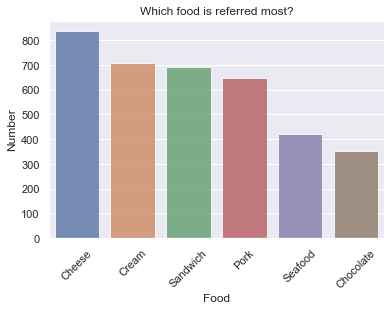

In [23]:
#热门的评价食物
Food = {"Food":["Cheese","Cream","Sandwich","Pork","Seafood","Chocolate"],
        "Number":[838,708,694,646,423,354],
        }
food = pd.DataFrame(Food)
f, axis = plt.subplots(1,1,figsize=(6,4))
sns.barplot(food["Food"], food["Number"], alpha=0.8, ax=axis)
plt.title("Which food is referred most?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.xlabel('Food', fontsize=12)
plt.ylabel('Number', fontsize=12)

In [24]:
review_user = pd.merge(review_RTM, user, how='left', left_on='user_id', right_on='user_id',left_index=False)
review_user

review_id                 user_id             business_id  \
0     kKC5pBPkUCWo6mKYFUewRw  mGnZFbk2gqLLtGW-mYo__A  ytynqOUb3hjKeJfRj5Tshw   
1     sFQrhTbTah0o2kU_Pi2D0Q  Tu4ATXLhy8kRTjpQCnl2pA  ytynqOUb3hjKeJfRj5Tshw   
2     kqn1uP3LRVjVDUD44ZSu1A  vRNb2IaGlsZRA_wUf3Ov8w  ytynqOUb3hjKeJfRj5Tshw   
3     qMsTe9QznpNQk1AKbYLp-w  29K-usmZfVDeIaQ85EG54A  ytynqOUb3hjKeJfRj5Tshw   
4     nmMIRBNONIICe7CFHnfadQ  1jE--VcTddwXGampD23JCg  ytynqOUb3hjKeJfRj5Tshw   
...                      ...                     ...                     ...   
5773  FS4s6ANq0cCB7oGx0Jja_A  IrxE8r0s0jHl1O7-ZO2vaQ  ytynqOUb3hjKeJfRj5Tshw   
5774  -cwyNL9V16r00LaZpWYKyQ  JcozeLfzqqcb0zu4BFA-Vg  ytynqOUb3hjKeJfRj5Tshw   
5775  lxhApXYxKTg6hgnbD93Tag  aREzu8wiB_1NYMzi_TgN0A  ytynqOUb3hjKeJfRj5Tshw   
5776  4yFZtkdc7SPueWozB6zmwQ  ttg9bK1FuUDZQNIleuR-KQ  ytynqOUb3hjKeJfRj5Tshw   
5777  MVg4YUQeEhCA7Z7RsBJSVg  7-7A0Avj47slLGV7yBFc8w  ytynqOUb3hjKeJfRj5Tshw   

      stars  useful_x  funny_x  cool_x  \
0         5         0        0       0   
1         5         0        0       0   
2         5         0        0       0   
3         4         5        2       3   
4         4         0        0       0   
...     ...       ...      ...     ...   
5773      5         2        0       0   
5774      5         1        0       0   
5775      5         1        2       1   
5776      5         0        1       0   
5777      3         1        0       0   

                                                   text                date  \
0     I love this place! Doesn't take me long to get... 2016-08-25 16:30:53   
1     One of my favorite places to go to in Philly, ... 2016-07-14 20:24:15   
2     This might be a bit unfair to have a single re... 2017-04-07 22:27:22   
3     Alright, I remember the first time I went to t... 2017-07-18 17:33:29   
4     It's an experience, to say the least!  Not as ... 2013-08-03 20:18:22   
...                                                 ...                 ...   
5773  Love this market! This is a popular destinatio... 2018-03-28 19:39:19   
5774  Love it here!\n\nEveryone has to visit here ev... 2019-09-27 14:43:56   
5775  Market full of treats and foods to eat and try... 2011-07-13 22:53:14   
5776  If it wasn't for my friend dragging me out, I ... 2019-12-21 18:46:06   
5777  I was so excited about all the food I saw, but... 2013-07-25 21:00:15   

                                             text_clear  ... compliment_more  \
0            love place doesnt take long get food great  ...               0   
1     one favorite places go philly take every one v...  ...               0   
2     might bit unfair single review stall different...  ...               0   
3     alright remember first time went reading termi...  ...               5   
4     experience say least many good vegan options s...  ...               0   
...                                                 ...  ...             ...   
5773  love market popular destination locals tourist...  ...               1   
5774  love everyone visit even one day amish pancake...  ...               0   
5775  market full treats foods eat tryit seemed like...  ...              29   
5776  wasnt friend dragging think would spent whole ...  ...               1   
5777  excited food saw unfortunately place closes ea...  ...               6   

      compliment_profile compliment_cute  compliment_list  compliment_note  \
0                      0               0                0                0   
1                      0               0                0                0   
2                      0               0                0                0   
3                      0               1                0               41   
4                      0               0                0                1   
...                  ...             ...              ...              ...   
5773                   0               0                0                0   
5774               

$商家得分$

Text(0.5, 0, 'Star Ratings ')

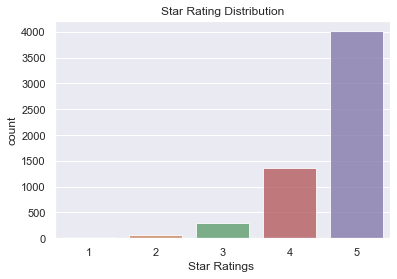

In [25]:
x=review_RTM['stars'].value_counts()
x=x.sort_index()

plt.figure(figsize=(6,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('count', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

In [26]:
def year(data):
    return data.year
review_RTM['year'] = review_RTM['date'].apply(year)
y2 = review_RTM.groupby('year')['stars'].mean()
y2

year
2005    5.000000
2006    5.000000
2007    4.577778
2008    4.630137
2009    4.680851
2010    4.576642
2011    4.538889
2012    4.587678
2013    4.544747
2014    4.563830
2015    4.594595
2016    4.586742
2017    4.613977
2018    4.641129
2019    4.612705
2020    4.631336
2021    4.763780
2022    4.866667
Name: stars, dtype: float64

In [27]:
y = review_RTM.groupby('year').agg("count")
y['count'] = y['review_id']
y1 = y['count'].tolist()

In [28]:
year_rank = {'year':y2.index,'star':y2.values,'count':y['review_id'].values,'ani':[1]*18}
df_year_rank = pd.DataFrame(year_rank)
df_year_rank

year      star  count  ani
0   2005  5.000000      1    1
1   2006  5.000000      8    1
2   2007  4.577778     45    1
3   2008  4.630137     73    1
4   2009  4.680851     94    1
5   2010  4.576642    137    1
6   2011  4.538889    180    1
7   2012  4.587678    211    1
8   2013  4.544747    514    1
9   2014  4.563830    658    1
10  2015  4.594595    814    1
11  2016  4.586742    709    1
12  2017  4.613977    601    1
13  2018  4.641129    744    1
14  2019  4.612705    488    1
15  2020  4.631336    217    1
16  2021  4.763780    254    1
17  2022  4.866667     30    1

In [29]:
#animation_group='country',range_y = [30,100], range_x = [-5000,55000],labels = {'gdpPercap':'GDP', 'lifeExp':'Life Expectancy'}
px.scatter(df_year_rank, x='star', y='count',
           color='star', size='count', size_max=50,range_x = [4.5,5],range_y = [0,900],
           animation_frame='year'
           )

In [30]:
# #animation_group='country',range_y = [30,100], range_x = [-5000,55000],labels = {'gdpPercap':'GDP', 'lifeExp':'Life Expectancy'}
# px.scatter(review_RTM, x='weekday', y='stars',
#            color='stars', size='year', size_max=10,
#            animation_frame='year'
#            )

In [31]:
##调色
x = np.arange(0,18)
y = x ** 2
norm = plt.Normalize(y.min(), y.max())
norm_y = norm(y)
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)

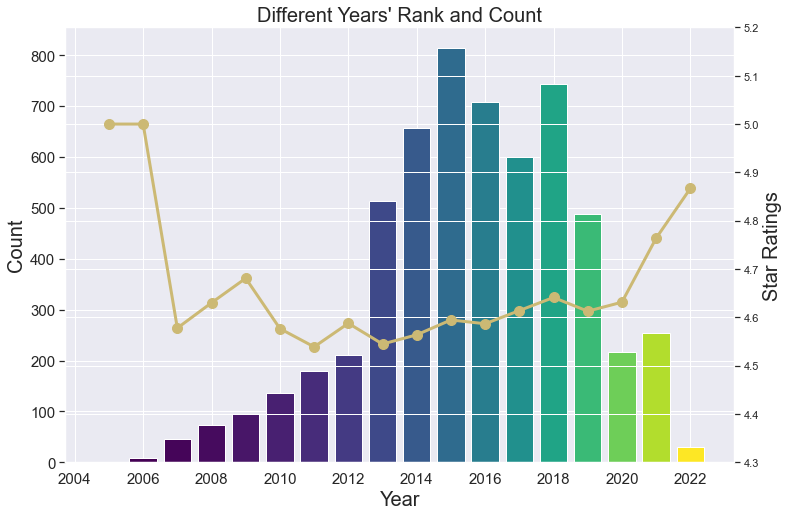

In [32]:
x = list(range(2005,2023))
fig = plt.figure(figsize=(12,8))

# 画柱形图
ax1 = fig.add_subplot(111)
ax1.bar(x, y1, color=color)
ax1.set_ylabel('Count', fontsize='20')
ax1.set_xlabel('Year', fontsize='20')
ax1.tick_params(labelsize=15)

# 画折线图
ax2 = ax1.twinx()
ax2.plot(x, y2, ms=10, lw=3, marker='o',color='y')
ax2.set_ylim([4.3,5.2])
ax2.set_ylabel('Star Ratings', fontsize='20')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Different Years' Rank and Count", fontsize='20')
plt.show()

In [33]:
tem = review_user[review_user['elite'] != '']
tem

review_id                 user_id             business_id  \
3     qMsTe9QznpNQk1AKbYLp-w  29K-usmZfVDeIaQ85EG54A  ytynqOUb3hjKeJfRj5Tshw   
12    nXlVrkRB8ehO3Dd0kLSexQ  L7zPC6FjX72ITZaw_4D_ow  ytynqOUb3hjKeJfRj5Tshw   
28    ujTbrZfud01_VVwk3vhTyQ  Vd9hFqOGzttsbjsRJXniCw  ytynqOUb3hjKeJfRj5Tshw   
32    ZX5q5tX6kJ3JawZ3mqjrTg  QYq9xrdrvJwN-bMgjy-ckg  ytynqOUb3hjKeJfRj5Tshw   
38    F7kX06-ZGzk8RX6oSH0cbw  hIlQOXn094Q205B_vu7Sjw  ytynqOUb3hjKeJfRj5Tshw   
...                      ...                     ...                     ...   
5772  PLz2H7Xw53JBbKFOBBjUjg  UXXjORs9YJ7DMnr4MB91GQ  ytynqOUb3hjKeJfRj5Tshw   
5773  FS4s6ANq0cCB7oGx0Jja_A  IrxE8r0s0jHl1O7-ZO2vaQ  ytynqOUb3hjKeJfRj5Tshw   
5775  lxhApXYxKTg6hgnbD93Tag  aREzu8wiB_1NYMzi_TgN0A  ytynqOUb3hjKeJfRj5Tshw   
5776  4yFZtkdc7SPueWozB6zmwQ  ttg9bK1FuUDZQNIleuR-KQ  ytynqOUb3hjKeJfRj5Tshw   
5777  MVg4YUQeEhCA7Z7RsBJSVg  7-7A0Avj47slLGV7yBFc8w  ytynqOUb3hjKeJfRj5Tshw   

      stars  useful_x  funny_x  cool_x  \
3         4         5        2       3   
12        5         2        1       1   
28        5         3        0       2   
32        5         0        0       0   
38        5         0        0       1   
...     ...       ...      ...     ...   
5772      5         2        0       0   
5773      5         2        0       0   
5775      5         1        2       1   
5776      5         0        1       0   
5777      3         1        0       0   

                                                   text                date  \
3     Alright, I remember the first time I went to t... 2017-07-18 17:33:29   
12    LOVED THIS PLACE!\n\nAs a former Washingtonian... 2012-05-29 14:40:10   
28    Let's start by saying this is the place to go ... 2015-01-03 20:49:08   
32    Reading Terminal is a Quincy Market that had a... 2017-02-19 16:08:17   
38    This was probably the best indoor market I hav... 2011-11-30 16:18:02   
...                                                 ...                 ...   
5772  Must\n\nReading terminal is a must. Everything... 2022-01-01 21:15:58   
5773  Love this market! This is a popular destinatio... 2018-03-28 19:39:19   
5775  Market full of treats and foods to eat and try... 2011-07-13 22:53:14   
5776  If it wasn't for my friend dragging me out, I ... 2019-12-21 18:46:06   
5777  I was so excited about all the food I saw, but... 2013-07-25 21:00:15   

                                             text_clear  ... compliment_more  \
3     alright remember first time went reading termi...  ...               5   
12    loved place former washingtonian high standard...  ...              13   
28    lets start saying place go u hungry many varie...  ...               7   
32    reading terminal quincy market thousand babies...  ...               0   
38    probably best indoor market seen us much going...  ...               4   
...                                                 ...  ...             ...   
5772  must reading terminal must everything youre lo...  ...               3   
5773  love market popular destination locals tourist...  ...               1   
5775  market full treats foods eat tryit seemed like...  ...              29   
5776  wasnt friend dragging think would spent whole ...  ...               1   
5777  excited food saw unfortunately place closes ea...  ...               6   

      compliment_profile compliment_cute  compliment_list  compliment_note  \
3                      0               1                0               41   
12                     4               2                3               33   
28                     0               0                0               47   
32                     2               0                0                6   
38                     4               1                1               18   
...                  ...             ...              ...              ...   
5772                   0               0                0                8   
5773               

In [34]:
tem.sort_values(by='fans' , inplace=True, ascending=False)
# tem['text']
def count(str):
    str_list = str.split()
    return  len(str_list)
tem['text_count'] = tem['text'].apply(count)
tem['text_count']

5289    201
5438    675
4504    637
5594    130
4727    179
       ... 
3248     88
3211    108
413     174
2477     59
322      86
Name: text_count, Length: 1955, dtype: int64

In [35]:
elite = pd.read_csv("elite.csv")
elite

Unnamed: 0               review_id                 user_id  \
0              3  qMsTe9QznpNQk1AKbYLp-w  29K-usmZfVDeIaQ85EG54A   
1             12  nXlVrkRB8ehO3Dd0kLSexQ  L7zPC6FjX72ITZaw_4D_ow   
2             28  ujTbrZfud01_VVwk3vhTyQ  Vd9hFqOGzttsbjsRJXniCw   
3             32  ZX5q5tX6kJ3JawZ3mqjrTg  QYq9xrdrvJwN-bMgjy-ckg   
4             38  F7kX06-ZGzk8RX6oSH0cbw  hIlQOXn094Q205B_vu7Sjw   
...          ...                     ...                     ...   
1950        5772  PLz2H7Xw53JBbKFOBBjUjg  UXXjORs9YJ7DMnr4MB91GQ   
1951        5773  FS4s6ANq0cCB7oGx0Jja_A  IrxE8r0s0jHl1O7-ZO2vaQ   
1952        5775  lxhApXYxKTg6hgnbD93Tag  aREzu8wiB_1NYMzi_TgN0A   
1953        5776  4yFZtkdc7SPueWozB6zmwQ  ttg9bK1FuUDZQNIleuR-KQ   
1954        5777  MVg4YUQeEhCA7Z7RsBJSVg  7-7A0Avj47slLGV7yBFc8w   

                 business_id  stars  useful_x  funny_x  cool_x  \
0     ytynqOUb3hjKeJfRj5Tshw      4         5        2       3   
1     ytynqOUb3hjKeJfRj5Tshw      5         2        1       1   
2     ytynqOUb3hjKeJfRj5Tshw      5         3        0       2   
3     ytynqOUb3hjKeJfRj5Tshw      5         0        0       0   
4     ytynqOUb3hjKeJfRj5Tshw      5         0        0       1   
...                      ...    ...       ...      ...     ...   
1950  ytynqOUb3hjKeJfRj5Tshw      5         2        0       0   
1951  ytynqOUb3hjKeJfRj5Tshw      5         2        0       0   
1952  ytynqOUb3hjKeJfRj5Tshw      5         1        2       1   
1953  ytynqOUb3hjKeJfRj5Tshw      5         0        1       0   
1954  ytynqOUb3hjKeJfRj5Tshw      3         1        0       0   

                                                   text                 date  \
0     Alright, I remember the first time I went to t...  2017-07-18 17:33:29   
1     LOVED THIS PLACE!\n\nAs a former Washingtonian...  2012-05-29 14:40:10   
2     Let's start by saying this is the place to go ...  2015-01-03 20:49:08   
3     Reading Terminal is a Quincy Market that had a...  2017-02-19 16:08:17   
4     This was probably the best indoor market I hav...  2011-11-30 16:18:02   
...                                                 ...                  ...   
1950  Must\n\nReading terminal is a must. Everything...  2022-01-01 21:15:58   
1951  Love this market! This is a popular destinatio...  2018-03-28 19:39:19   
1952  Market full of treats and foods to eat and try...  2011-07-13 22:53:14   
1953  If it wasn't for my friend dragging me out, I ...  2019-12-21 18:46:06   
1954  I was so excited about all the food I saw, but...  2013-07-25 21:00:15   

      ... compliment_more compliment_profile  compliment_cute compliment_list  \
0     ...               5                  0                1               0   
1     ...              13                  4                2               3   
2     ...               7                  0                0               0   
3     ...               0                  2                0               0   
4     ...               4                  4                1               1   
...   ...             ...                ...              ...             ...   
1950  ...               3                  0                0               0   
1951  ...               1                  0                0               0   
1952  ...              29                 47               33               9   
1953  ...               1                  0                0               0   
1954  ...               6                  3                3               0   

      compliment_note  compliment_plain  compliment_cool compliment_funny  \
0                  41                26               42               42   
1                  33                64               55               55   
2                  47                77              163              163   
3                   6                 0                9                9   
4                  18                34               32               32   


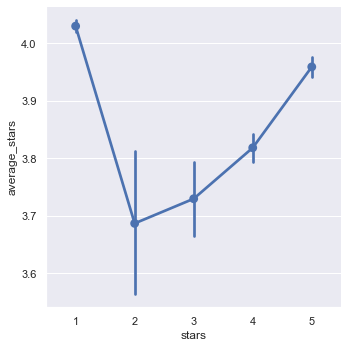

In [36]:
sns.catplot(data=elite, x='stars', y='average_stars', kind='point')

<AxesSubplot:xlabel='stars', ylabel='average_stars'>

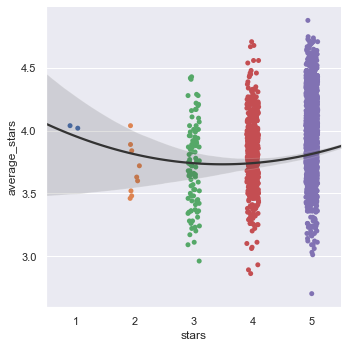

In [37]:
import seaborn as sns
sns.set_theme()

sns.catplot(
    data=elite, x="stars", y="average_stars", hue="stars", zorder=1
)
sns.regplot(
    data=elite, x="stars", y="average_stars",
    scatter=False, truncate=False, order=2, color=".2"
)


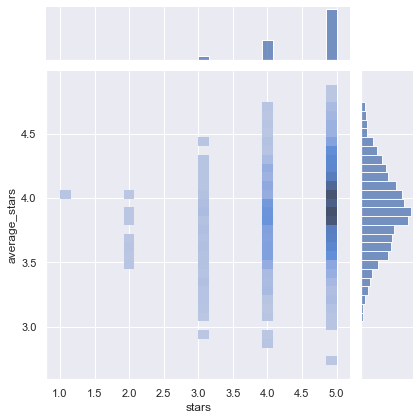

In [38]:
elite['stars_floating'] = elite['stars'] - 0.5 + np.random.random(len(elite['stars']))
sns.jointplot(data=elite, x='stars', y='average_stars',  kind='hist')

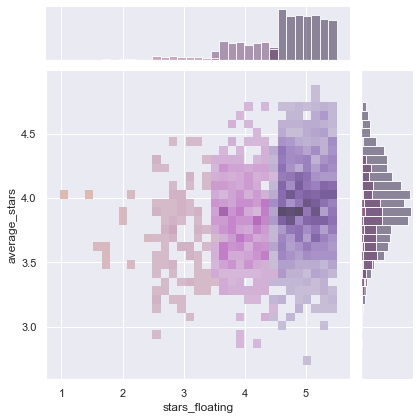

In [39]:
import numpy as np
elite['stars_floating'] = elite['stars'] - 0.5 + np.random.random(len(elite['stars']))
sns.jointplot(data=elite, x='stars_floating', y='average_stars', hue='stars', kind='hist', legend =False)

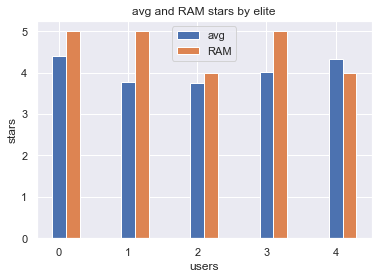

In [40]:
y1 = [4.39, 3.77, 3.74, 4.01, 4.33] # 平均给分
y2 = [5,5,4,5,4]   #给分
x = [1,2,3,4,5]

x1 = list(range(len(x)))
x2 = [i+0.2 for i in x1]

plt.bar(x1, y1, width=0.2, label="avg")
plt.bar(x2, y2, width=0.2, label="RAM")

plt.ylabel('stars', fontsize=12)
plt.xlabel('users', fontsize=12)
plt.title("avg and RAM stars by elite")

plt.legend()
plt.show()

$分析评论关系$

In [41]:
review_RTM

review_id                 user_id  \
6290881  kKC5pBPkUCWo6mKYFUewRw  mGnZFbk2gqLLtGW-mYo__A   
6291053  sFQrhTbTah0o2kU_Pi2D0Q  Tu4ATXLhy8kRTjpQCnl2pA   
6291157  kqn1uP3LRVjVDUD44ZSu1A  vRNb2IaGlsZRA_wUf3Ov8w   
6291166  qMsTe9QznpNQk1AKbYLp-w  29K-usmZfVDeIaQ85EG54A   
6291460  nmMIRBNONIICe7CFHnfadQ  1jE--VcTddwXGampD23JCg   
...                         ...                     ...   
6988905  FS4s6ANq0cCB7oGx0Jja_A  IrxE8r0s0jHl1O7-ZO2vaQ   
6989657  -cwyNL9V16r00LaZpWYKyQ  JcozeLfzqqcb0zu4BFA-Vg   
6989825  lxhApXYxKTg6hgnbD93Tag  aREzu8wiB_1NYMzi_TgN0A   
6990041  4yFZtkdc7SPueWozB6zmwQ  ttg9bK1FuUDZQNIleuR-KQ   
6990255  MVg4YUQeEhCA7Z7RsBJSVg  7-7A0Avj47slLGV7yBFc8w   

                    business_id  stars  useful  funny  cool  \
6290881  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291053  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291157  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291166  ytynqOUb3hjKeJfRj5Tshw      4       5      2     3   
6291460  ytynqOUb3hjKeJfRj5Tshw      4       0      0     0   
...                         ...    ...     ...    ...   ...   
6988905  ytynqOUb3hjKeJfRj5Tshw      5       2      0     0   
6989657  ytynqOUb3hjKeJfRj5Tshw      5       1      0     0   
6989825  ytynqOUb3hjKeJfRj5Tshw      5       1      2     1   
6990041  ytynqOUb3hjKeJfRj5Tshw      5       0      1     0   
6990255  ytynqOUb3hjKeJfRj5Tshw      3       1      0     0   

                                                      text  \
6290881  I love this place! Doesn't take me long to get...   
6291053  One of my favorite places to go to in Philly, ...   
6291157  This might be a bit unfair to have a single re...   
6291166  Alright, I remember the first time I went to t...   
6291460  It's an experience, to say the least!  Not as ...   
...                                                    ...   
6988905  Love this market! This is a popular destinatio...   
6989657  Love it here!\n\nEveryone has to visit here ev...   
6989825  Market full of treats and foods to eat and try...   
6990041  If it wasn't for my friend dragging me out, I ...   
6990255  I was so excited about all the food I saw, but...   

                       date  \
6290881 2016-08-25 16:30:53   
6291053 2016-07-14 20:24:15   
6291157 2017-04-07 22:27:22   
6291166 2017-07-18 17:33:29   
6291460 2013-08-03 20:18:22   
...                     ...   
6988905 2018-03-28 19:39:19   
6989657 2019-09-27 14:43:56   
6989825 2011-07-13 22:53:14   
6990041 2019-12-21 18:46:06   
6990255 2013-07-25 21:00:15   

                                                text_clear  year  
6290881         love place doesnt take long get food great  2016  
6291053  one favorite places go philly take every one v...  2016  
6291157  might bit unfair single review stall different...  2017  
6291166  alright remember first time went reading termi...  2017  
6291460  experience say least many good vegan options s...  2013  
...                                                    ...   ...  
6988905  love market popular destination locals tourist...  2018  
6989657  love everyone visit even one day amish pancake...  2019  
6989825  market full treats foods eat tryit seemed like...  2011  
6990041  wasnt friend dragging think would spent whole ...  2019  
6990255  excited food saw unfortunately place closes ea...  2013  

[5778 rows x 11 columns]

In [42]:
def count(str):
    str_list = str.split()
    return  len(str_list)
review_RTM['text_count'] = review_RTM['text'].apply(count)
review_RTM

review_id                 user_id  \
6290881  kKC5pBPkUCWo6mKYFUewRw  mGnZFbk2gqLLtGW-mYo__A   
6291053  sFQrhTbTah0o2kU_Pi2D0Q  Tu4ATXLhy8kRTjpQCnl2pA   
6291157  kqn1uP3LRVjVDUD44ZSu1A  vRNb2IaGlsZRA_wUf3Ov8w   
6291166  qMsTe9QznpNQk1AKbYLp-w  29K-usmZfVDeIaQ85EG54A   
6291460  nmMIRBNONIICe7CFHnfadQ  1jE--VcTddwXGampD23JCg   
...                         ...                     ...   
6988905  FS4s6ANq0cCB7oGx0Jja_A  IrxE8r0s0jHl1O7-ZO2vaQ   
6989657  -cwyNL9V16r00LaZpWYKyQ  JcozeLfzqqcb0zu4BFA-Vg   
6989825  lxhApXYxKTg6hgnbD93Tag  aREzu8wiB_1NYMzi_TgN0A   
6990041  4yFZtkdc7SPueWozB6zmwQ  ttg9bK1FuUDZQNIleuR-KQ   
6990255  MVg4YUQeEhCA7Z7RsBJSVg  7-7A0Avj47slLGV7yBFc8w   

                    business_id  stars  useful  funny  cool  \
6290881  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291053  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291157  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291166  ytynqOUb3hjKeJfRj5Tshw      4       5      2     3   
6291460  ytynqOUb3hjKeJfRj5Tshw      4       0      0     0   
...                         ...    ...     ...    ...   ...   
6988905  ytynqOUb3hjKeJfRj5Tshw      5       2      0     0   
6989657  ytynqOUb3hjKeJfRj5Tshw      5       1      0     0   
6989825  ytynqOUb3hjKeJfRj5Tshw      5       1      2     1   
6990041  ytynqOUb3hjKeJfRj5Tshw      5       0      1     0   
6990255  ytynqOUb3hjKeJfRj5Tshw      3       1      0     0   

                                                      text  \
6290881  I love this place! Doesn't take me long to get...   
6291053  One of my favorite places to go to in Philly, ...   
6291157  This might be a bit unfair to have a single re...   
6291166  Alright, I remember the first time I went to t...   
6291460  It's an experience, to say the least!  Not as ...   
...                                                    ...   
6988905  Love this market! This is a popular destinatio...   
6989657  Love it here!\n\nEveryone has to visit here ev...   
6989825  Market full of treats and foods to eat and try...   
6990041  If it wasn't for my friend dragging me out, I ...   
6990255  I was so excited about all the food I saw, but...   

                       date  \
6290881 2016-08-25 16:30:53   
6291053 2016-07-14 20:24:15   
6291157 2017-04-07 22:27:22   
6291166 2017-07-18 17:33:29   
6291460 2013-08-03 20:18:22   
...                     ...   
6988905 2018-03-28 19:39:19   
6989657 2019-09-27 14:43:56   
6989825 2011-07-13 22:53:14   
6990041 2019-12-21 18:46:06   
6990255 2013-07-25 21:00:15   

                                                text_clear  year  text_count  
6290881         love place doesnt take long get food great  2016          16  
6291053  one favorite places go philly take every one v...  2016          83  
6291157  might bit unfair single review stall different...  2017         162  
6291166  alright remember first time went reading termi...  2017         220  
6291460  experience say least many good vegan options s...  2013          37  
...                                                    ...   ...         ...  
6988905  love market popular destination locals tourist...  2018         110  
6989657  love everyone visit even one day amish pancake...  2019          23  
6989825  market full treats foods eat tryit seemed like...  2011          52  
6990041  wasnt friend dragging think would spent whole ...  2019          95  
6990255  excited food saw unfortunately place closes ea...  2013          46  

[5778 rows x 12 columns]

In [43]:
review_RTM.describe()

stars       useful        funny        cool         year  \
count  5778.000000  5778.000000  5778.000000  5778.00000  5778.000000   
mean      4.605400     0.852025     0.356698     0.62738  2015.635687   
std       0.683178     2.811746     1.680661     2.43150     3.023997   
min       1.000000     0.000000     0.000000     0.00000  2005.000000   
25%       4.000000     0.000000     0.000000     0.00000  2014.000000   
50%       5.000000     0.000000     0.000000     0.00000  2016.000000   
75%       5.000000     1.000000     0.000000     0.00000  2018.000000   
max       5.000000    78.000000    49.000000    71.00000  2022.000000   

        text_count  
count  5778.000000  
mean     77.381620  
std      71.014835  
min       2.000000  
25%      32.000000  
50%      56.000000  
75%      99.000000  
max     888.000000

Text(0.5, 1.0, 'Heatmap of Variables')

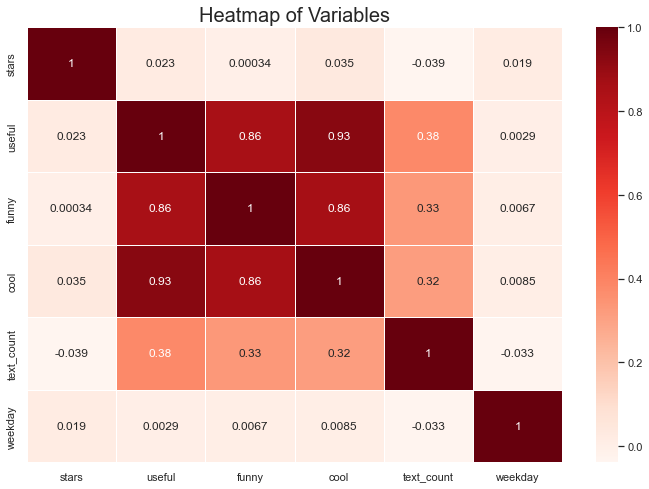

In [44]:
def weekday(day):
    return datetime.strptime(day,"%Y-%m-%d %H:%M:%S").weekday()
review_RTM['weekday'] = review_RTM['date'].astype('str').apply(weekday)
review_RTM_cor = review_RTM[['stars', 'useful', 'funny', 'cool', 'text_count','weekday']].corr()
fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(review_RTM_cor, cmap='Reds', linewidth=1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=20)

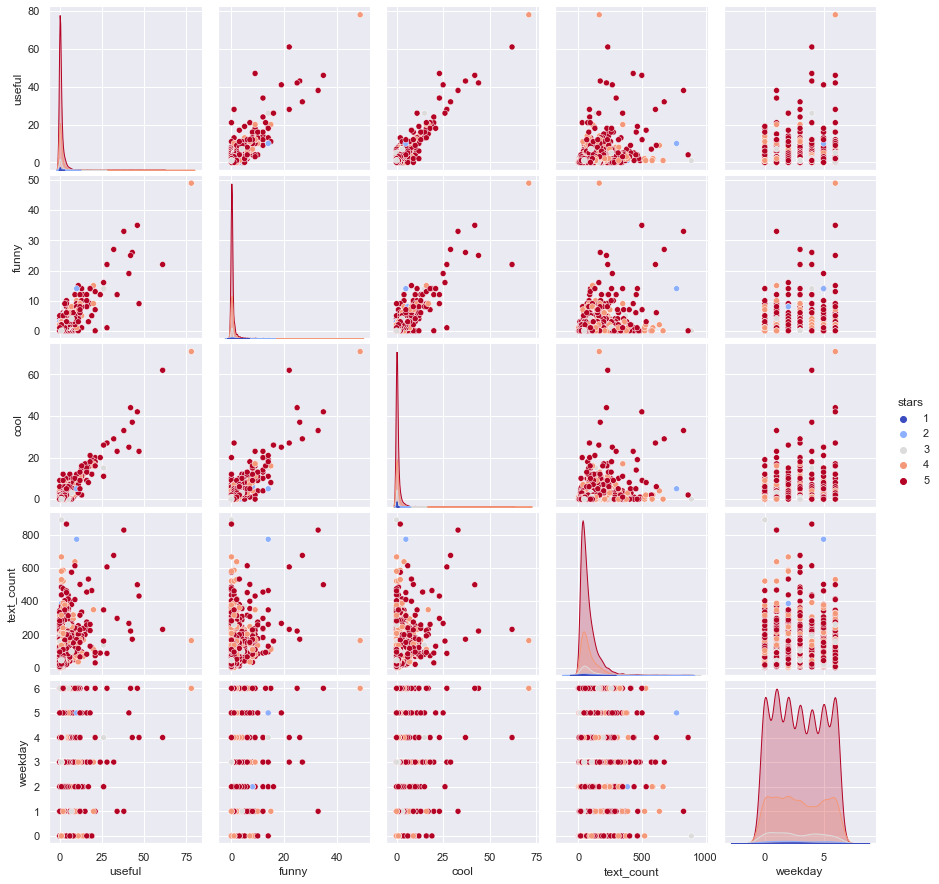

In [45]:
sns.pairplot(review_RTM[['stars', 'useful', 'funny', 'cool', 'text_count','weekday']], hue='stars', palette='coolwarm')

<AxesSubplot:xlabel='stars', ylabel='text_count'>

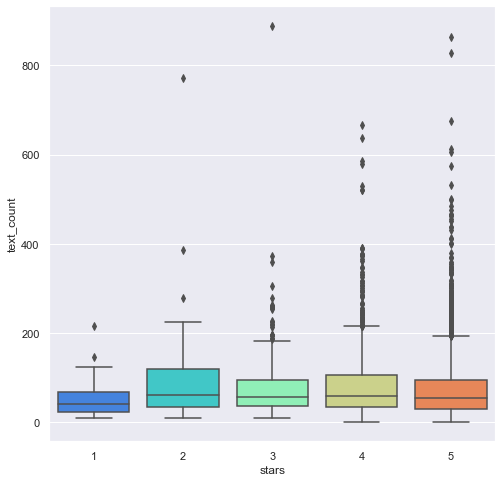

In [46]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='stars', y='text_count', data=review_RTM, palette='rainbow')

<AxesSubplot:xlabel='stars', ylabel='weekday'>

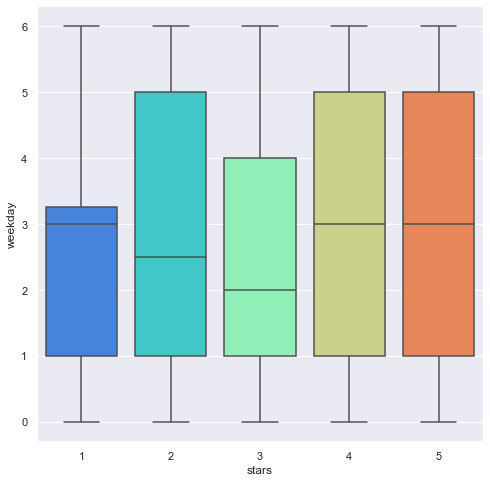

In [47]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(x='stars', y='weekday', data=review_RTM, palette='rainbow')

In [48]:
review_RTM['count']=1

In [49]:
rev_gro = review_RTM.groupby(['stars','weekday'],as_index=False).sum()
rev_gro

stars  weekday  useful  funny  cool     year  text_count  count
0       1        0       0      1     0     4035          85      2
1       1        1       1      7     0    10073         312      5
2       1        2       0      0     0     8069         119      4
3       1        3       0      3     0    14124         335      7
4       1        4       2      1     1     2021          51      1
5       1        5       0      0     0     4033         147      2
6       1        6       0      0     0     6041         334      3
7       2        0      14      3     6    26181        1062     13
8       2        1       2      1     0    16119         456      8
9       2        2      15     11     8    28212        1707     14
10      2        3       2      2     1    16127         336      8
11      2        4       0      1     0    12102         499      6
12      2        5      18     23     9    20178        1714     10
13      2        6       4      5     2    22178         881     11
14      3        0      58     23    32   116849        5827     58
15      3        1      34     18    16    88717        3816     44
16      3        2      33     14    14   106851        4160     53
17      3        3       8      6     6    50372        1955     25
18      3        4      50     24    28    98784        3692     49
19      3        5      20      8    14    76590        2423     38
20      3        6       9      3     1    74578        2333     37
21      4        0     169     63   119   439235       18304    218
22      4        1     151     60   100   398964       17348    198
23      4        2     167     55   116   417147       18884    207
24      4        3     189     94   147   374759       13779    186
25      4        4     100     35    63   308363       12597    153
26      4        5      98     36    83   378938       14536    188
27      4        6     210     90   161   435380       18023    216
28      5        0     461    154   323  1199193       43503    595
29      5        1     522    226   443  1237528       47717    614
30      5        2     520    238   368  1168919       45367    580
31      5        3     595    286   448  1104619       45623    548
32      5        4     518    184   379  1066502       38457    529
33      5        5     408    148   296  1110966       38291    551
34      5        6     545    238   441  1203596       42438    597

In [50]:
#animation_group='country',range_y = [30,100], range_x = [-5000,55000],labels = {'gdpPercap':'GDP', 'lifeExp':'Life Expectancy'}
px.scatter(rev_gro, x='stars', y='count',
           color='stars', size='count',size_max=100,
           animation_frame='weekday'
           )

Text(0.5, 0, 'Weekday')

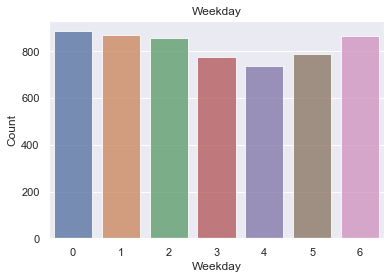

In [51]:
x=review_RTM['weekday'].value_counts()
x=x.sort_index()

plt.figure(figsize=(6,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Weekday")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Weekday', fontsize=12)

In [52]:
x

0    886
1    869
2    858
3    774
4    738
5    789
6    864
Name: weekday, dtype: int64

**社交网络**

In [53]:
review_RTM.head()

review_id                 user_id  \
6290881  kKC5pBPkUCWo6mKYFUewRw  mGnZFbk2gqLLtGW-mYo__A   
6291053  sFQrhTbTah0o2kU_Pi2D0Q  Tu4ATXLhy8kRTjpQCnl2pA   
6291157  kqn1uP3LRVjVDUD44ZSu1A  vRNb2IaGlsZRA_wUf3Ov8w   
6291166  qMsTe9QznpNQk1AKbYLp-w  29K-usmZfVDeIaQ85EG54A   
6291460  nmMIRBNONIICe7CFHnfadQ  1jE--VcTddwXGampD23JCg   

                    business_id  stars  useful  funny  cool  \
6290881  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291053  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291157  ytynqOUb3hjKeJfRj5Tshw      5       0      0     0   
6291166  ytynqOUb3hjKeJfRj5Tshw      4       5      2     3   
6291460  ytynqOUb3hjKeJfRj5Tshw      4       0      0     0   

                                                      text  \
6290881  I love this place! Doesn't take me long to get...   
6291053  One of my favorite places to go to in Philly, ...   
6291157  This might be a bit unfair to have a single re...   
6291166  Alright, I remember the first time I went to t...   
6291460  It's an experience, to say the least!  Not as ...   

                       date  \
6290881 2016-08-25 16:30:53   
6291053 2016-07-14 20:24:15   
6291157 2017-04-07 22:27:22   
6291166 2017-07-18 17:33:29   
6291460 2013-08-03 20:18:22   

                                                text_clear  year  text_count  \
6290881         love place doesnt take long get food great  2016          16   
6291053  one favorite places go philly take every one v...  2016          83   
6291157  might bit unfair single review stall different...  2017         162   
6291166  alright remember first time went reading termi...  2017         220   
6291460  experience say least many good vegan options s...  2013          37   

         weekday  count  
6290881        3      1  
6291053        3      1  
6291157        4      1  
6291166        1      1  
6291460        5      1